# CS105 Mini-Project

For this project, we designed and conducted a survey targeting students from CS105, CS111, and CS010C classes to examine their caffeine consumption. Our objective was to gain insight into their daily habits, and to see if we could extrapolate any interesting conclusions from our data.

## What is our data about?

Our data focuses on students' caffeine consumption and its relationship to their lifestyle and health habits. It includes information on how frequently students consume caffeine, their preferred sources (such as coffee, energy drinks, or tea), and additional factors like sleep patterns, energy levels throughout the day, and other health-related behaviors. By analyzing this data, we aim to uncover connections between caffeine use and students' overall well-being, examining how it influences their sleep quality, daily energy levels, and possibly other health impacts.

## What would we like to know about our data?

We aim to learn how caffeine consumption affects students' daily routines, particularly regarding their sleep quality, energy levels, and overall health. By examining the frequency and sources of caffeine intake, along with lifestyle factors like sleep habits and other health behaviors, we hope to identify patterns that may reveal how caffeine influences students' physical and mental well-being. Additionally, we want to see if there are any notable trends among students in terms of their dependency on caffeine for focus and energy, helping us better understand the potential impacts of caffeine on their academic and personal lives.

## Data Exploration/Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/CleanedResponses.csv")

### Is there an association between how often students consume caffine and their academic standing?

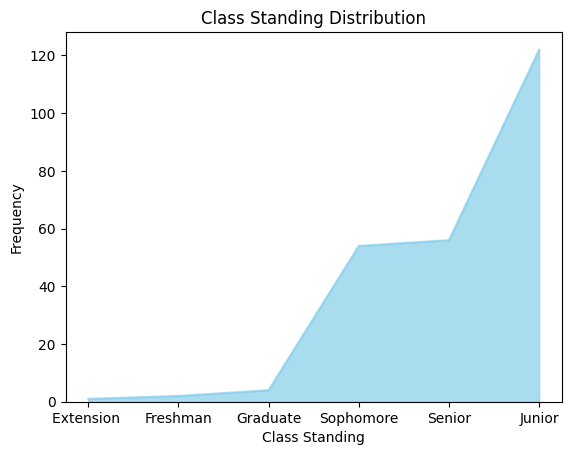

In [12]:
class_counts = df['classStanding'].value_counts()
#class_counts_other = class_counts[class_counts >= 5]
#class_counts_other['Other'] = class_counts[class_counts < 5].sum()
'''
plt.figure(figsize=(8, 6))
class_counts_other.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon', 'lightgreen', 'orange','green','purple'])
plt.title('Class Standing Distribution')
plt.ylabel('')
plt.show()'''

class_counts_other = class_counts.sort_values()  # Sort by class standing
class_counts_other.plot(kind='area', stacked=True, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'green', 'purple'], alpha=0.7)
plt.title('Class Standing Distribution')
plt.xlabel('Class Standing')
plt.ylabel('Frequency')
plt.show()

This stacked area graph visualization illustrates the distribution of class standings among students in the CS010C, CS111, and CS105 courses who participated in the survey. Juniors dominate the participant pool, representing just around 120 responses. Seniors and sophomores follow, comprising about 60 responses each, with seniors being a little higher. The Freshman, Graduate, and Extension students, collectively accounts for the remaining participants, with a few for each category. The stacked area chart helps show how each class standing contributes to the total survey population, with a clear emphasis on juniors as the largest group.

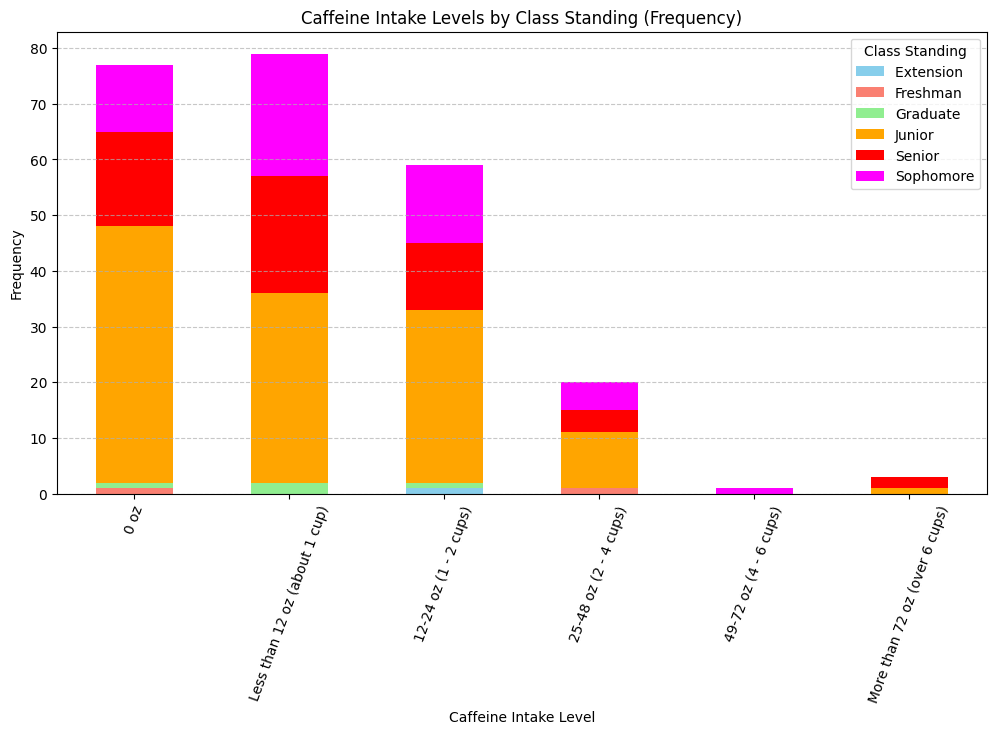

In [8]:
caffeine_counts = pd.crosstab(df['caffeineIntake'], df['classStanding'])

intake_order = ["0 oz", "Less than 12 oz (about 1 cup)", "12-24 oz (1 - 2 cups)", "25-48 oz (2 - 4 cups)", "49-72 oz (4 - 6 cups)", "More than 72 oz (over 6 cups)"]
caffeine_counts = caffeine_counts.loc[intake_order]

caffeine_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon', 'lightgreen', 'orange', 'red', 'magenta'])

plt.title('Caffeine Intake Levels by Class Standing (Frequency)')
plt.xlabel('Caffeine Intake Level')
plt.xticks(rotation=70)
plt.ylabel('Frequency')
plt.legend(title="Class Standing")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The stacked bar graph above compares students' caffeine intake levels with their academic standing. While juniors appear to have the highest caffeine consumption, this aligns with the previous stacked area chart showing that juniors made up the largest proportion of survey participants. Similarly, the "Extension," "Graduate," and "Freshman" categories have a smaller representation, which can also be seen through the stacked area graph.

The stacked bar graph reveals that most students consume no more than four cups of caffeine, with very few students drinking between 2-4 cups. A fair number of students report an intake of 1-2 cups, while those who do not consume caffeine or have only one cup form nearly equal groups, both slightly larger than the 1-2 cup category. Overall, the distribution appears balanced across academic standings, given the higher participation of juniors and the smaller numbers for freshmen, extension, and graduate students.

## Hypothesis: There is no association between a student's class standing and their caffine intake level

I will be using the Chi-Square test to test my hypothesis to check if these two variables are independent are not. 

In [ ]:
from scipy.stats import chi2_contingency, chi2

caffeine_counts = pd.crosstab(df['caffeineIntake'], df['classStanding'])

chi, p, dfree, expected = chi2_contingency(caffeine_counts)
print("calculated chi square value:", chi)
print("calculated p value:", p)
print("degree of freedom:", dfree)

significance_level = 0.05
critical_value = chi2.ppf(1 - significance_level, dfree)
print(f"Critical value for {dfree} degrees of freedom at the 0.05 significance level:", critical_value)

if chi > critical_value:
    print("Reject the null hypothesis: there is a significant association between caffeine intake and class standing.")
else:
    print("Fail to reject the null hypothesis: no significant association found between caffeine intake and class standing.")

calculated chi square value: 21.667691157763443
calculated p value: 0.6548528883879966
degree of freedom: 25
Critical value for 25 degrees of freedom at the 0.05 significance level: 37.65248413348277
Fail to reject the null hypothesis: no significant association found between caffeine intake and class standing.


Based on the results of our Chi-Square test, we calculated a chi-square value of approximately 22. Comparing this to the critical value of approximately 38 at a 0.05 significance level, we find that our chi-square value is smaller than the critical value. Therefore, we fail to reject the null hypothesis, suggesting that there is no significant association between caffeine intake and class standing. This outcome is consistent with our initial hypothesis.

### FIXME: REPLACE WITH APPROPRIATE TITLE FOR TEST (ZIFENG)

In [71]:
# Zifeng's portion (chi-squared test) heat map

### FIXME: REPLACE WITH APPROPRIATE TITLE FOR TEST (JOEL)

In [72]:
# Joel's portion (correlation analysis) scatterplot

### FIXME: REPLACE WITH APPROPRIATE TITLE FOR TEST (SARAH)

In [73]:
# Sarah's portion (whatever test you'd like)

## Conclusions

THIS IS FOR RICHARD